# Histogram plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ultraplot as uplt
from ipywidgets import interact
from ipywidgets import widgets

import psdist as ps
import psdist.plot as psv

In [2]:
uplt.rc["cmap.discrete"] = False
uplt.rc["cmap.sequential"] = "viridis"
uplt.rc["colorbar.width"] = "1.2em"
uplt.rc["figure.facecolor"] = "white"
uplt.rc["grid"] = False

## 2D histograms

In [3]:
# seed = 1951
# resolution = 50

# rng = np.random.default_rng(seed)
# coords = 2 * [np.linspace(-5.0, 5.0, resolution)]

# hist = ps.Histogram(coords=coords)
# X, Y = hist.meshgrid()

# values = np.zeros((resolution, resolution))
# for _ in range(4):
#     loc = rng.uniform(-2.0, +2.0, size=2)
#     scale = rng.uniform(+0.5, +1.5, size=2)
#     values += np.exp(
#         -0.5 * (((X - loc[0]) / scale[0]) ** 2 + ((Y - loc[1]) / scale[1]) ** 2)
#     )
# values = values**2
# hist.values = values

# hist.values /= hist.values.max()
# hist.values[hist.values < 0.001] = 0.0

In [4]:
# fig, axs = uplt.subplots(ncols=3, figwidth=8.0)
# for ax, kind in zip(axs, ["pcolor", "contourf", "contour"]):
#     psv.plot_hist(
#         hist,
#         kind=kind,
#         process_kws=dict(),
#         offset=1.0,
#         offset_type="relative",
#         mask=False,
#         profx=True,
#         profy=True,
#         prof_kws=dict(kind="step"),
#         rms_ellipse=False,
#         rms_ellipse_kws=dict(),
#         colorbar=True,
#         colorbar_kw=dict(),
#         norm="log",
#         vmax=1.0,
#         vmin=1.00e-03,
#         ax=ax,
#     )

### Joint plot 

In [5]:
# grid = psv.JointGrid(
#     panel_kws=dict(width=0.5),
#     panel_fmt_kws=None,
#     panel_fmt_kws_x=None,
#     panel_fmt_kws_y=None,
#     figwidth=3.5,
# )
# grid.plot_hist(
#     hist,
#     panel_plot_kws=dict(scale="max", kind="line"),
#     norm="log",
#     vmax=1.0,
#     cmap=uplt.Colormap("greys", left=0.0, right=0.8),
# )

# grid.plot_points(
#     hist.sample(1_000),
#     panel_hist_kws=dict(bins="auto"),
#     panel_plot_kws=dict(scale="max", kind="step", color="red"),
#     kind="scatter",
#     s=1.0,
#     color="red",
#     label="samples",
# )
# grid.ax_panel_x.format(yscale="log", yformatter="log", ymin=0.0001)
# grid.ax_panel_y.format(xscale="log", xformatter="log", xmin=0.0001)
# plt.show()

## ND histograms 

In [6]:
resolution = 50
ndim = 4
xmax = 5.0

rng = np.random.default_rng(123)

dims = ["x", "px", "y", "py", "z"][:ndim]
pairs = [(i, j) for i in range(ndim) for j in range(i)]

shape = tuple(ndim * [resolution])
coords = ndim * [np.linspace(-xmax, xmax, resolution)]
COORDS = np.meshgrid(*coords, indexing="ij")
R = np.sqrt(np.sum([C**2 for C in COORDS], axis=0))

# Start with gaussian * cosine
values = 0.25 * np.exp(-0.5 * (R / 2.0)) * np.cos(3.0 * R) ** 2
values[R > 4.0] = 0.0
for _ in range(8):
    # Generate a Gaussian distribution with random mean and std.
    loc = rng.uniform(-3.0, +3.0, size=ndim)
    scale = rng.uniform(+0.5, +1.0, size=ndim)
    argument = np.zeros(shape)
    for i in range(ndim):
        argument += ((COORDS[i] - loc[i]) / scale[i]) ** 2

    # Add random linear correlations.
    for i, j in pairs:
        r = rng.uniform(-0.5, 0.5)
        U = (COORDS[i] - loc[i]) / scale[i]
        V = (COORDS[j] - loc[j]) / scale[j]
        argument += r * U * V
    values += np.exp(-0.5 * argument)

hist = ps.Histogram(values=values, coords=coords)
hist.values = hist.values / hist.values.max()
hist.values[hist.values < 0.0001] = 0.0

### Corner plot 

In [7]:
# kinds = ["pcolor", "contourf", "contour"]
# diag_kws = [
#     dict(kind="step", fill=False),
#     dict(kind="line", fill=False),
#     dict(kind="line", fill=True),
# ]
# diag_shrink = [1.0, 0.8, 1.0]
# for i, kind in enumerate(kinds):
#     grid = psv.hist.plot_corner(
#         hist,
#         grid_kws=dict(
#             corner=(i < 2),
#             diag_shrink=diag_shrink[i],
#             diag_share=(i != 1),
#             diag_rspine=(i < 2),
#             space=1.5,
#             labels=dims,
#         ),
#         diag_kws=diag_kws[i],
#         kind=kind,
#     )
#     plt.show()

Don't plot diagonals; plot 1D projections on top of 2D projections.

In [8]:
# grid = psv.hist.plot_corner(
#     hist,
#     grid_kws=dict(diag=False, space=0.0, labels=dims),
#     prof_edge_only=True,
#     profx=True,
#     profy=True,
#     prof_kws=dict(color="white"),
# )

# # grid.set_labels(dims)
# grid.axs.format(xspineloc="neither", yspineloc="neither")
# plt.show()

Use `CornerGrid`; add 1D spines, logarithmic colormap and scaling.

In [9]:
# cmap = uplt.Colormap("grays")

# grid = psv.CornerGrid(
#     values.ndim,
#     corner=True,
#     diag=True,
#     diag_share=True,
#     space=2.0,
#     diag_rspine=True,
#     labels=dims,
# )
# grid.plot_hist(
#     hist,
#     cmap=cmap,
#     diag_kws=dict(color=cmap(0.9)),
#     process_kws=dict(scale="max"),
#     kind="contourf",
#     norm="log",
#     vmax=1.0,
#     vmin=0.001,
#     alpha=0.75,
# )
# grid.plot_points(
#     ps.sample_hist(hist, size=500),
#     update_limits=True,
#     diag_kws=dict(color="red"),
#     kind="scatter",
#     c="red",
#     s=0.85,
# )
# grid.set_limits(hist.limits * 1.2)
# grid.set_diag_scale("log")
# plt.show()

### Slice matrix

This plot shows the dependence of the $x$-$p_x$ distribution on $y$ and $y'$: $f(x, p_x | y, p_y)$. The 3D marginal distributions $f(x, p_x, y | p_y)$ and $f(x, p_x, p_y | y)$ are shown on the right and bottom panels. The full projection $f(x, p_x)$ is shown on the bottom right.

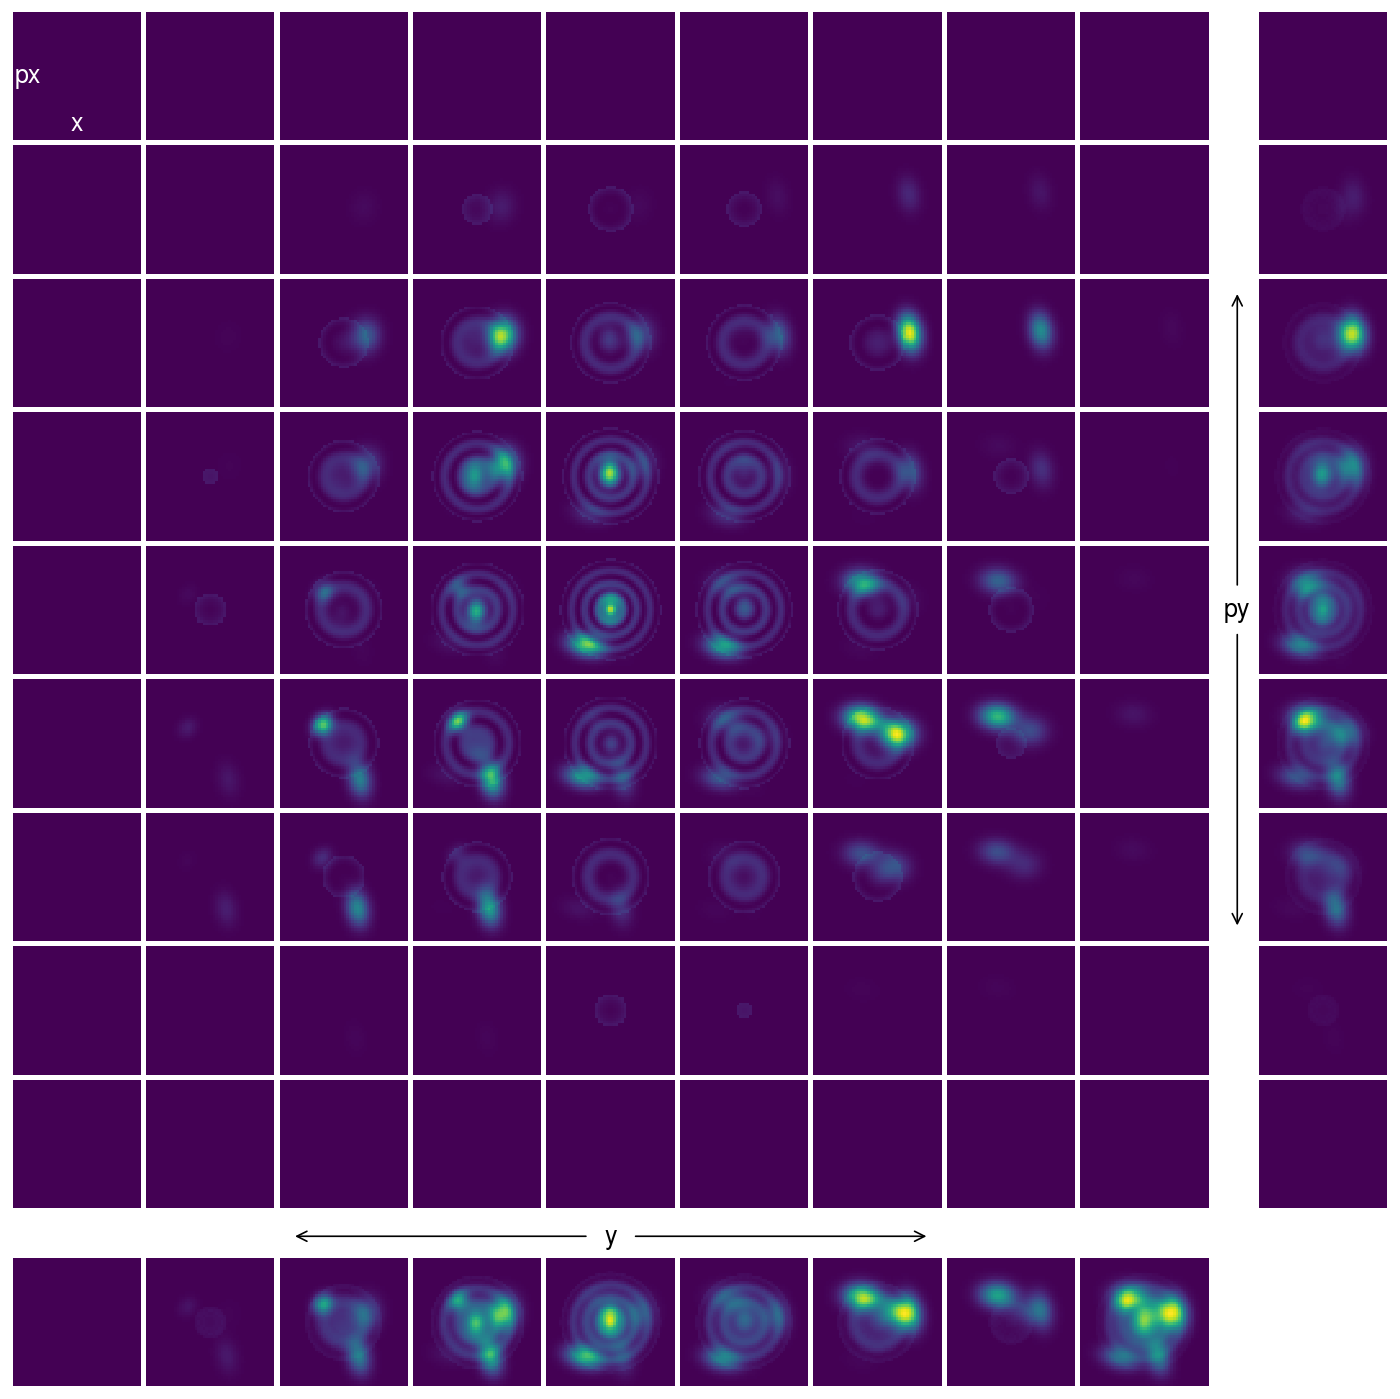

In [10]:
for norm in (None, "log")[:1]:
    grid = psv.SliceGrid(
        nrows=9,
        ncols=9,
        space=0.2,
        gap=2.0,
        marginals=True,
        annotate=True,
        annotate_kws_view=dict(color="white"),
        annotate_kws_slice=dict(color="black"),
        xspineloc="neither",
        yspineloc="neither",
        figwidth=7.0,
    )
    grid.plot_hist(
        hist.project(axis=(0, 1, 2, 3)),
        labels=dims,
        axis_view=(0, 1),
        axis_slice=(2, 3),
        debug=False,
        vmax=1.0,  # shared cmap
        norm=norm,
        offset=1.0,  # offset to deal with zeros for log cmap
    )
    plt.show()

(Can also call `psv.image.slice_matrix(f, coords, ...)`.

### 1D projection with interactive slicing

In [11]:
# psv.image.interactive_slice_1d(
#     values,
#     coords=coords,
#     dims=dims,
#     slice_type="range",  # {"int", "range"}
#     fig_kws=dict(ylabel="Density"),
#     kind="step",
#     fill=True,
# )

### 2D projection with interactive slicing

In [12]:
# psv.image.interactive_slice_2d(
#     values,
#     coords=coords,
#     dims=dims,
#     slice_type="range",  # {"int", "range"}
#     profiles_checkbox=True,
#     kind="pcolor",
#     cmap="viridis",
# )

### Contour slices

Here, we observe the 1D projection of the distribution within an ($n - 1$)-dimensional contour slice in the other dimensions. See https://arxiv.org/abs/2301.04178.

In [13]:
# @interact(
#     dim=widgets.Dropdown(options=dims, value=dims[0]),
#     levels=widgets.FloatRangeSlider(
#         description="(n-1) thresh",
#         min=0.0,
#         max=1.0,
#         value=(0.0, 1.0),
#         step=0.001,
#         continuous_update=True,
#     ),
# )
# def update(dim: int, levels: float):
#     lmin, lmax = levels
#     axis = dims.index(dim)
#     profile = ps.image.project_contour_slice_1d(values, axis=axis, lmin=lmin, lmax=lmax)
#     profile = psv.scale_profile(profile, coords=coords[axis], scale="density")

#     fig, ax = uplt.subplots(figsize=(4, 1.5))
#     ax.format(xlabel=dims[axis], ylabel="Density")
#     psv.plot_profile(
#         profile,
#         coords=coords[axis],
#         ax=ax,
#         kind="line",
#         fill=True,
#         color="black",
#         lw=2.0,
#     )
#     plt.show()

We can do the same thing with a 2D projection of the distribution within an ($n - 2$)-dimensional contour slice in the other dimensions.

In [14]:
# @interact(
#     dim1=widgets.Dropdown(options=dims, value=dims[0]),
#     dim2=widgets.Dropdown(options=dims, value=dims[1]),
#     levels=widgets.FloatRangeSlider(
#         description="(d-2) thresh",
#         min=0.0,
#         max=1.0,
#         value=(0.0, 1.0),
#         step=0.001,
#         readback_format=".3f",
#     ),
#     log=False,
# )
# def update(dim1: int, dim2: int, levels: float, log: bool, **plot_kws):
#     if dim1 == dim2:
#         return
#     axis = (dims.index(dim1), dims.index(dim2))
#     lmin, lmax = levels
#     projection = ps.image.project2d_contour(values, axis=axis, lmin=lmin, lmax=lmax)

#     plot_kws["norm"] = "log" if log else None
#     plot_kws.setdefault("process_kws", dict(thresh=0.001, thresh_type="frac"))
#     plot_kws.setdefault("colorbar", True)
#     plot_kws.setdefault("profx", True)
#     plot_kws.setdefault("profy", True)
#     plot_kws.setdefault("offset", 1.0 if log else None)

#     fig, ax = uplt.subplots()
#     ax.format(xlabel=dims[axis[0]], ylabel=dims[axis[1]])
#     psv.image.plot(projection, coords=[coords[i] for i in axis], ax=ax, **plot_kws)
#     ax.format(xlim=sorted(ax.get_xlim()))
#     plt.show()